## Importing The Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing The Dataset

There is no dependent variable, a priori, when implementing a clustering, especially K-Means clustering. <br>

So, here the last column is not a dependent variable, it is a feature which we will use as part of the other feature to identify some patterns in the data

Some of the columns here won't help identify pattern in the data, example customer id. The customer id is just giving id to the customer and has no impact on the data pattern. So, we can exclude the customer id column.

Just for learning purposes, we will only use Annual Income and Spending Score.

In [ ]:
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:, [3, 4]].values

## Using The Elbow Method to Find The Optimal Number of Clusters

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

## Plotting The WCSS Values

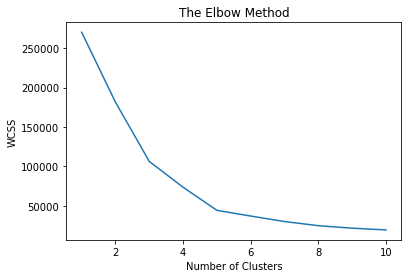

In [15]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Training The K-Means Model on The Dataset

In [20]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [22]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## Visualizing The Clusters

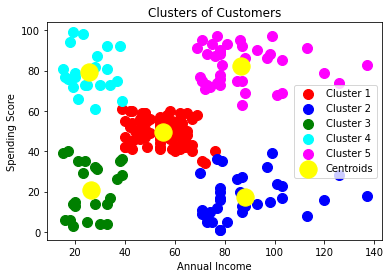

In [49]:
#Plotting Each Cluster
plt.scatter(X[y_kmeans == 0, 0],X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0],X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0],X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0],X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0],X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

#plotting centroids of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

#Labeling The Plot
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

#Displaying The Scatterplot
plt.show()